In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import numpy as np
import pdb

# my code
from distribution import RBMLatentPosterior, MultivariateBernoulliNoise
from latent_nce_optimiser import LatentNCEOptimiser
from latent_variable_model import RestrictedBoltzmannMachine

from matplotlib import pyplot as plt
from matplotlib import rc
from numpy import random as rnd

%matplotlib inline
rc('lines', linewidth=3)
rc('font', size=18)
rc('legend', fontsize=18)

# For reproducibility
rng = rnd.RandomState(1083463236)

# Model definition

In [3]:
n = 100000 # number of datapoints
nz = 1  # number latent samples per datapoint
nu = 1

d = 10  # visible dimension
m = 4  # latent dimension

true_W = rnd.uniform(-0.5, 0.5, (d+1, m+1))
theta0 = rnd.uniform(-0.5, 0.5, (d+1, m+1))

In [4]:
true_data_dist = RestrictedBoltzmannMachine(true_W)
X, Z = true_data_dist.sample(n, num_iter=1000)

In [5]:
X_mean = np.mean(X, axis=0)
# X_centred = X - X_mean
# X_cov = (1/n)*np.dot(X_centred.T, X_centred)

In [6]:
model = RestrictedBoltzmannMachine(theta0)

In [7]:
noise = MultivariateBernoulliNoise(X_mean)  # uniform dist over binary vectors i.e p(u) = 2**-d
var_dist = RBMLatentPosterior(theta0)

In [8]:
optimiser = LatentNCEOptimiser(model, noise, var_dist, n, nu=nu, latent_samples_per_datapoint=nz)

# Validation

In [9]:
all_visibles = true_data_dist.get_all_binary_vectors(d)
visible_probs, norm_const = true_data_dist.normalised_and_marginalised_over_z(all_visibles)

In [10]:
print('Sum over all visible probabilities should equal 1. We got: {}'.format(sum(visible_probs)))

Sum over all visible probabilities should equal 1. We got: 1.0


In [11]:
print('-------------------------Visible probability spot-checks--------------------------------------')
for i in range(0, 2**d, 50):
    freq = np.sum(np.product((X == all_visibles[i]), axis=-1))/ len(X)
    print('{}:  Empirical frequency is {}. True frequency is {}'.format(all_visibles[i], 
                                                                         freq, visible_probs[i]))

-------------------------Visible probability spot-checks--------------------------------------
[0 0 0 0 0 0 0 0 0 0]:  Empirical frequency is 0.00162. True frequency is 0.001885675608071886
[0 0 0 0 1 1 0 0 1 0]:  Empirical frequency is 0.00139. True frequency is 0.0013936807275663396
[0 0 0 1 1 0 0 1 0 0]:  Empirical frequency is 0.00137. True frequency is 0.0015329360905819798
[0 0 1 0 0 1 0 1 1 0]:  Empirical frequency is 0.00127. True frequency is 0.0011498953897252407
[0 0 1 1 0 0 1 0 0 0]:  Empirical frequency is 0.00059. True frequency is 0.0006380326386043064
[0 0 1 1 1 1 1 0 1 0]:  Empirical frequency is 0.00052. True frequency is 0.0005220083574735652
[0 1 0 0 1 0 1 1 0 0]:  Empirical frequency is 0.00042. True frequency is 0.0005094572793291571
[0 1 0 1 0 1 1 1 1 0]:  Empirical frequency is 0.00168. True frequency is 0.0016493539237028899
[0 1 1 0 0 1 0 0 0 0]:  Empirical frequency is 0.0015. True frequency is 0.0014531427967526878
[0 1 1 1 0 0 0 0 1 0]:  Empirical frequency

In [12]:
print('normalisation constant is: {}'.format(norm_const))

normalisation constant is: 13678.939785263532


In [13]:
all_hiddens = true_data_dist.get_all_binary_vectors(m)
hidden_probs, norm_const = true_data_dist.normalised_and_marginalised_over_u(all_hiddens)

In [14]:
print('Sum over all hidden probabilities should equal 1. We got: {}'.format(sum(hidden_probs)))

Sum over all hidden probabilities should equal 1. We got: 1.0000000000000007


In [15]:
var_dist.alpha = true_W.reshape(-1)
Z_from_posterior_class = var_dist.sample(1000, X)

In [16]:
print('-------------------------Hidden probability checks--------------------------------------')
for i in range(2**m):
    freq = np.mean(np.product((Z_from_posterior_class == all_hiddens[i]), axis=(-1)))
    print('{}:  Empirical frequency is {}. True frequency is {}'.format(all_hiddens[i], 
                                                                         freq, hidden_probs[i]))

-------------------------Hidden probability checks--------------------------------------
[0 0 0 0]:  Empirical frequency is 0.05769053. True frequency is 0.057820732175212705
[0 0 0 1]:  Empirical frequency is 0.0678314. True frequency is 0.06786730991309983
[0 0 1 0]:  Empirical frequency is 0.07871614. True frequency is 0.0788700487647121
[0 0 1 1]:  Empirical frequency is 0.09800198. True frequency is 0.09786744196619779
[0 1 0 0]:  Empirical frequency is 0.03885326. True frequency is 0.038846631367799055
[0 1 0 1]:  Empirical frequency is 0.04946379. True frequency is 0.049407213073337945
[0 1 1 0]:  Empirical frequency is 0.05284396. True frequency is 0.052830249435116446
[0 1 1 1]:  Empirical frequency is 0.07101883. True frequency is 0.07084574951117063
[1 0 0 0]:  Empirical frequency is 0.05093324. True frequency is 0.05108159595740877
[1 0 0 1]:  Empirical frequency is 0.06142073. True frequency is 0.06152991627924588
[1 0 1 0]:  Empirical frequency is 0.07162391. True frequen

In [17]:
print('normalisation constant is: {}'.format(norm_const))

normalisation constant is: 13678.939785263532


# Optimisation

Optimization terminated successfully.
         Current function value: 1.386969
         Iterations: 68
         Function evaluations: 71
         Gradient evaluations: 71
Optimization terminated successfully.
         Current function value: 1.386538
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51
Optimization terminated successfully.
         Current function value: 1.386312
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51
Optimization terminated successfully.
         Current function value: 1.386249
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51
Optimization terminated successfully.
         Current function value: 1.386074
         Iterations: 51
         Function evaluations: 52
         Gradient evaluations: 52
Optimization terminated successfully.
         Current function value: 1.386054
         Iterations: 51
         Function evaluations: 52
  

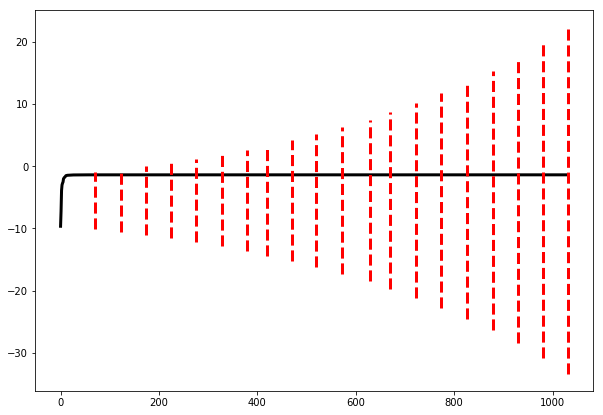

In [18]:
thetas_after_EM_step, J1s, J1_grads = optimiser.fit_using_analytic_q(X, theta0=theta0.reshape(-1), stop_threshold=1e-06)

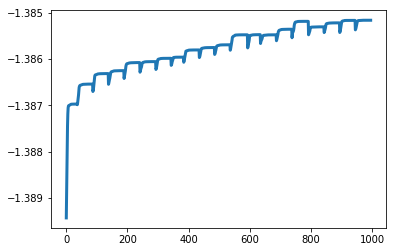

In [42]:
trunc_J1s = J1s[35:]
plt.plot(np.arange(len(trunc_J1s)), trunc_J1s)

# Learnt parameters compared with true parameters

In [19]:
print('Parameters learnt by the model.')
print('First element of matrix (scaling param) should equal {}'.format(-np.log(norm_const)))
model.theta.reshape(d+1, m+1)

Parameters learnt by the model.
First element of matrix (scaling param) should equal -9.52361268709595


array([[-8.68674280e+00, -3.93378442e-01, -4.60403354e-01,
        -9.26989452e-02,  1.16184402e-01],
       [-5.15248499e-01, -1.04522076e-01,  2.01940949e-01,
         3.80776795e-01,  5.74065025e-01],
       [ 1.89761552e-01, -3.24784850e-01,  1.14845725e-01,
        -6.00849076e-01,  6.10897345e-02],
       [-7.64821943e-01, -5.18835489e-01, -5.48236570e-03,
         3.90179142e-01, -1.35723275e-01],
       [ 2.55029094e-01,  4.24482616e-01, -2.41737774e-01,
        -2.19230250e-01,  2.62572337e-01],
       [-3.78617363e-01, -1.49875452e-01,  3.69347011e-02,
         1.22409918e-01, -4.32134674e-01],
       [ 1.08619908e+00,  1.44930131e-01, -3.73134508e-01,
        -3.87597620e-01, -2.25224773e-01],
       [-7.09368148e-01,  5.31377990e-02,  3.46905624e-01,
         3.39050498e-01, -4.62718518e-01],
       [ 7.78599685e-02, -1.20220853e-01, -5.89074171e-02,
         1.02777807e-01, -1.29455576e-01],
       [-7.48432289e-01, -4.01378034e-04,  4.68054090e-01,
         3.30346037e-01

In [20]:
print('True parameters.')
true_W

True parameters.


array([[ 0.24471147, -0.1453449 , -0.08095538,  0.40586965,  0.22560258],
       [ 0.19593739, -0.48417044,  0.30131685, -0.31905409,  0.13473746],
       [-0.21833975,  0.18097323,  0.10085184,  0.08853293, -0.18378551],
       [-0.2610768 , -0.43405964, -0.45576656,  0.05401238, -0.39358665],
       [ 0.07241113,  0.42426321,  0.47370787, -0.23292722,  0.05520852],
       [-0.0256197 ,  0.18956544, -0.44063932, -0.33810831, -0.4894737 ],
       [ 0.21170892,  0.4001016 ,  0.04555838,  0.33759814,  0.08919853],
       [-0.40621052, -0.22403459, -0.37635593,  0.11981132, -0.04722346],
       [-0.41482625, -0.05405121, -0.10910549,  0.44043495,  0.38781973],
       [ 0.09853296, -0.44766414, -0.34231198, -0.2068521 , -0.10228093],
       [-0.44476718,  0.17866915, -0.37416819, -0.20907343,  0.28225528]])

# Visible marginal of model

In [21]:
all_visibles = model.get_all_binary_vectors(d)
model_visible_probs, model_norm_const = model.normalised_and_marginalised_over_z(all_visibles)

In [22]:
print('Sum over all visible probabilities should equal 1. We got: {}'.format(sum(model_visible_probs)))

Sum over all visible probabilities should equal 1. We got: 0.9999999999999999


In [23]:
print('-------------------------Visible probability spot-checks--------------------------------------')
for i in range(0, 2**d, 50):
    freq = np.sum(np.product((X == all_visibles[i]), axis=-1))/ len(X)
    print('{}:  Data frequency is {}. Model frequency is {}'.format(all_visibles[i], 
                                                                    freq, model_visible_probs[i]))

-------------------------Visible probability spot-checks--------------------------------------
[0 0 0 0 0 0 0 0 0 0]:  Data frequency is 0.00162. Model frequency is 0.001869683724226777
[0 0 0 0 1 1 0 0 1 0]:  Data frequency is 0.00139. Model frequency is 0.0014138457322432029
[0 0 0 1 1 0 0 1 0 0]:  Data frequency is 0.00137. Model frequency is 0.001502300288435611
[0 0 1 0 0 1 0 1 1 0]:  Data frequency is 0.00127. Model frequency is 0.0010936428161114299
[0 0 1 1 0 0 1 0 0 0]:  Data frequency is 0.00059. Model frequency is 0.0006324825915154884
[0 0 1 1 1 1 1 0 1 0]:  Data frequency is 0.00052. Model frequency is 0.0005127696297008055
[0 1 0 0 1 0 1 1 0 0]:  Data frequency is 0.00042. Model frequency is 0.0005493991541643729
[0 1 0 1 0 1 1 1 1 0]:  Data frequency is 0.00168. Model frequency is 0.0016718558205621485
[0 1 1 0 0 1 0 0 0 0]:  Data frequency is 0.0015. Model frequency is 0.0015333990477160381
[0 1 1 1 0 0 0 0 1 0]:  Data frequency is 0.00057. Model frequency is 0.00064877

In [24]:
print('normalisation constant is: {}.'.format(model_norm_const))

normalisation constant is: 1.0009298488272997.


# Latent marginal of model

In [25]:
all_hiddens = true_data_dist.get_all_binary_vectors(m)
model_hidden_probs, model_norm_const = model.normalised_and_marginalised_over_u(all_hiddens)

In [26]:
print('Sum over all hidden probabilities should equal 1. We got: {}'.format(sum(model_hidden_probs)))

Sum over all hidden probabilities should equal 1. We got: 1.0


In [27]:
print('-------------------------Hidden probability checks--------------------------------------')
for i in range(2**m):
    freq = np.mean(np.product((Z_from_posterior_class == all_hiddens[i]), axis=(-1)))
    print('{}:  Data frequency is {}. Model frequency is {}'.format(all_hiddens[i], 
                                                                    freq, model_hidden_probs[i]))

-------------------------Hidden probability checks--------------------------------------
[0 0 0 0]:  Data frequency is 0.05769053. Model frequency is 0.0979423881234491
[0 0 0 1]:  Data frequency is 0.0678314. Model frequency is 0.10110157288679746
[0 0 1 0]:  Data frequency is 0.07871614. Model frequency is 0.08397590282422811
[0 0 1 1]:  Data frequency is 0.09800198. Model frequency is 0.0849609865407377
[0 1 0 0]:  Data frequency is 0.03885326. Model frequency is 0.06068137846282424
[0 1 0 1]:  Data frequency is 0.04946379. Model frequency is 0.06164656607285757
[0 1 1 0]:  Data frequency is 0.05284396. Model frequency is 0.05837019851730664
[0 1 1 1]:  Data frequency is 0.07101883. Model frequency is 0.057973788756851545
[1 0 0 0]:  Data frequency is 0.05093324. Model frequency is 0.06507666318771262
[1 0 0 1]:  Data frequency is 0.06142073. Model frequency is 0.06923977291628959
[1 0 1 0]:  Data frequency is 0.07162391. Model frequency is 0.0533479658994322
[1 0 1 1]:  Data freque

In [28]:
print('normalisation constant is: {}'.format(model_norm_const))

normalisation constant is: 1.000929848827301


# Average log probabilities

$ \mathbb{E}_{x, z \sim P_{data}} \log(P_{model}(x, z)) \ \ \ \ \text{and} \ \ \ \ \mathbb{E}_{x, z \sim P_{model}} \log(P_{model}(x, z))$

In [29]:
model_X, model_Z = model.sample(n, num_iter=1000)
print('average log probability of P_model on true data: {} \n'
'average log probability of P_model on model data: {}'.format(
      np.mean(np.log(model(X, Z.reshape(1, n, -1)))), 
      np.mean(np.log(model(model_X, model_Z.reshape(1, n, -1))))))

average log probability of P_model on true data: -9.519125335821938 
average log probability of P_model on model data: -9.262429859426332


$ \mathbb{E}_{x, z \sim P_{data}} \log(P_{data}(x, z)) \ \ \ \ \text{and} \ \ \ \ \mathbb{E}_{x, z \sim P_{model}} \log(P_{data}(x, z))$

In [30]:
print('average log probability of P_data on true data: {} \n'
'average log probability of P_data on model data: {}'.format(
      np.mean(np.log(true_data_dist(X, Z.reshape(1, n, -1))/norm_const)), 
      np.mean(np.log(true_data_dist(model_X, model_Z.reshape(1, n, -1))/norm_const))))

average log probability of P_data on true data: -9.274480877674872 
average log probability of P_data on model data: -9.505078398566454


$ \mathbb{E}_{x \sim P_{data}} \log(P_{model}(x)) \ \ \ \ \text{and} \ \ \ \ \mathbb{E}_{x \sim P_{model}} \log(P_{model}(x))$

In [31]:
model_probs_of_true_data, norm_const = model.normalised_and_marginalised_over_z(X)
model_probs_of_model_data, _ = model.normalised_and_marginalised_over_z(model_X)
print('average log probability of P_model x-marginal on true data: {} \n'
'average log probability of P_model x-marginal on model data: {}'.format(
      np.mean(np.log(model_probs_of_true_data)), 
      np.mean(np.log(model_probs_of_model_data))))

average log probability of P_model x-marginal on true data: -6.641842405239333 
average log probability of P_model x-marginal on model data: -6.633070520591581


$ \mathbb{E}_{x \sim P_{data}} \log(P_{data}(x)) \ \ \ \ \text{and} \ \ \ \ \mathbb{E}_{x \sim P_{model}} \log(P_{data}(x))$

In [32]:
true_dist_probs_of_true_data, norm_const = true_data_dist.normalised_and_marginalised_over_z(X)
true_dist_probs_of_model_data, _ = true_data_dist.normalised_and_marginalised_over_z(model_X)
print('average log probability of P_data x-marginal on true data: {} \n'
'average log probability of P_data x-marginal on model data: {}'.format(
      np.mean(np.log(true_dist_probs_of_true_data)), 
      np.mean(np.log(true_dist_probs_of_model_data))))

average log probability of P_data x-marginal on true data: -6.641035264120727 
average log probability of P_data x-marginal on model data: -6.633995112287161
